In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Löse 
$f(x) = \sqrt{x} = a $
mittels fixpunktierationen

In [2]:
f = lambda x: np.power(x,2) - 9
# Newton
g = lambda x: 1/(2*x)
phi1 = lambda x: x - g(x)*f(x)

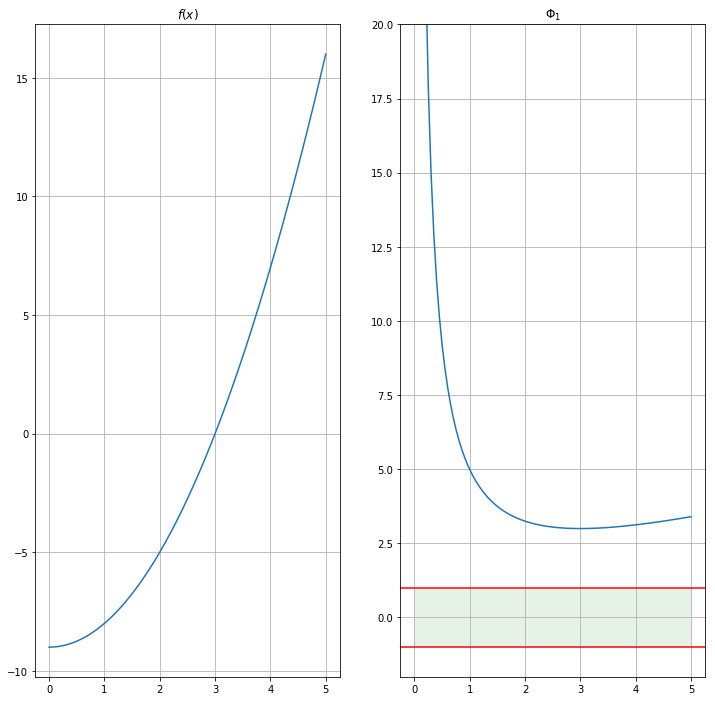

In [17]:
%matplotlib inline
x = np.linspace(0.0001,5, 100)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(121)
ax.plot(x,f(x))
ax.set_title('$f(x)$')
ax2 = fig.add_subplot(122)
ax2.plot(x,phi1(x))
ax2.set_title('$\Phi_1$')

axes = fig.get_axes()
[a.grid() for a in axes]
for a in axes[-1:]:
    a.set_ylim(-2,20)
    a.axhline(1,color='r')
    a.axhline(-1,color='r')
    rectangle = plt.Rectangle((min(x),-1), max(x), 2, fc='g',alpha=0.1)
    a.add_patch(rectangle)
plt.show()

### Iterationsvorschriften:

In [18]:
def fixpunktiter(phi, x0, maxiter):
    xk = [x0]
    for k in range(0,maxiter):
        xk.append(phi(xk[k]))
    return xk

In [21]:
startwerte = [1]
phi = phi1
maxiter = 10
ergebnisse = [fixpunktiter(phi=phi, x0=x0, maxiter=maxiter) for x0 in startwerte]

print('Ergebnisse:')
pd.DataFrame(np.array(ergebnisse).T, columns=startwerte)


Ergebnisse:


,1
0,1.000000
1,5.000000
2,3.400000
3,3.023529
4,3.000092
5,3.000000
6,3.000000
7,3.000000
8,3.000000
9,3.000000


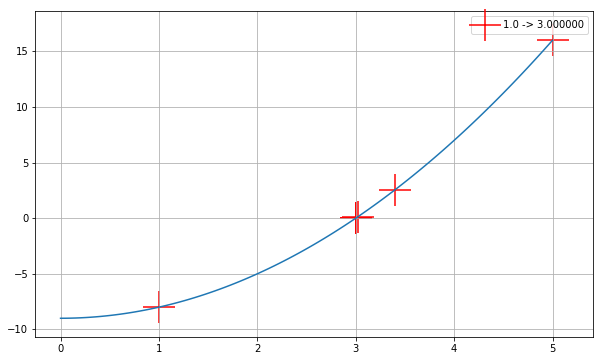

In [24]:
%matplotlib inline
x = np.linspace(0, 5, 100)
y = f(x)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x,y)
for n in range(len(ergebnisse)):
    xk = ergebnisse[n]
    ax.scatter(xk,f(xk),color='r', marker='+', s=1000,label='{:.1f} -> {:.6f}'.format(xk[0],xk[-1]))
ax.grid()
ax.legend(loc='best')
plt.show()